## <u>ANYTIME ASSISTANT - CHATBOT FOR ANYTIME FITNESS</u>


"AnytimeAssistant" is an intelligent chatbot designed to enhance the experience of users at Anytime Fitness gyms. It offers a range of features to both new and existing gym members. For new users, the chatbot guides them through enrollment, membership plans, promotions, nearest gym locations, and FAQs. Existing members can manage their memberships, access personalized analytics, find trainers, receive exercise recommendations, and determine the best times to visit the gym based on predicted occupancy. The chatbot utilizes sentiment analysis, cosine similarity, and regression to provide accurate suggestions and insights, ultimately offering a convenient and interactive way for gym-goers to achieve their fitness goals.

# Libraries Used in the Code

In [24]:
#For handling regex matching for user input validation
import re  

#For managing dataframes - collecting, manipulating and storing data
import pandas as pd  

#For calculating distance between two coordinates using haversine formula
import math  

#For plotting customer's profile analytics dashboard
import matplotlib.pyplot as plt

#For triggering confirmation email to user after enrollment
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

#For content filtering using cosine similarity and sentiment analysis
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#For accessing datetime functions
import datetime
from datetime import date, time, datetime, timedelta
import calendar

#For predicting gym occupancy using RandomForest Regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#For triggering an api request
import requests

#To avoid warning messages from being printed in the output
import warnings
warnings.filterwarnings("ignore")

# 1. New User Options:

This function presents the initial menu to a new user and provides two options: enrolling in Anytime Fitness or receiving general information. The user's choice is captured through the input, and based on the choice, corresponding functions are called.

In [25]:
def new_user_options():
    print("Welcome, new user! How can we assist you today?")
    print("1. Enroll in Anytime Fitness")
    print("2. General Information")
    choice = input("Please choose an option (1/2): ")
    
    if choice == "1":
        new_user_registration()
    elif choice == "2":
        general_info()
    else:
        print("Sorry, we couldn't understand your choice.")

# 2. New User Registration:

The following function collects user registration details, such as first name, last name, email, phone number, and zipcode, ensuring their validity through validation while loops. It guides users through input, validates email format, phone number format, and zipcode format before returning the gathered information.

In [26]:
def get_user_info():
    print("Take the time to discover Anytime Fitness. Access is FREE, and we'd love to show you around our gym!")
    first_name = input("What's your first name? ")
    last_name = input("What's your last name? ")

    while True:
        email = input("What's your email address? ")
        if not validate_email(email):
            print("Invalid email format. Please enter a valid email address.")
        else:
            break

    while True:
        phone_number = input("What's your phone number? ")
        if not validate_phone_number(phone_number):
            print("Invalid phone number format. Please enter a valid phone number.")
        else:
            break

    while True:
        zipcode = input("What's your zipcode? ")
        if not validate_zipcode(zipcode):
            print("Invalid zipcode format. Please enter a valid zipcode.")
        else:
            break
    
    return first_name, last_name, email, phone_number, zipcode

def validate_email(email):
    # Very basic email validation
    return re.match(r"[^@]+@[^@]+\.[^@]+", email)
def validate_phone_number(phone_number):
    #Phone number validation
    return re.match(r"\d{10}", phone_number)
def validate_zipcode(zipcode):
    return re.match(r"(\d{5})|([a-zA-Z]\d[a-zA-Z]\d[a-zA-Z]\d)", zipcode)

# 2.1 Terms and Conditions + Membership Selection 

In [27]:
def display_terms_and_conditions():
    text = '''Please select your membership plan from our options: 
    
1. Standard Membership:
Offerings: Access to gym facilities, including cardio and strength training areas.
Price: $30/month

2. Premium Membership:
Offerings: Access to gym facilities, group fitness classes, and personalized training sessions.
Price: $50/month

3. Platinum Membership:
Offerings: All-inclusive access, including premium gym features and spa services.
Price: $80/month'''

    print(text)
    membership_type = input("\nPlease enter your choice (Enter 1/2/3): ")
    if membership_type not in ["1","2","3"]:
        print("Please select a valid membership plan (1/2/3)")
        return display_terms_and_conditions()
    else:
        text = '''\nHere are our terms and conditions:
1. Must be 18 years of age or older. Valid ID required.
2. Valid at participating locations only.
3. Terms and conditions may vary.
4. Each Anytime Fitness is independently owned and operated.
5. By submitting my information, I accept the Terms & Conditions, Privacy Notice, and consent to receive marketing and other communications by email, phone and text from Anytime Fitness Franchisor LLC, its affiliates, franchisees and/or their authorized designees.
6. I can withdraw my consent at any time.
7. Message and data rates apply.
8. Full terms and conditions can be found at: www.anytimefitness.com or your local Anytime Fitness club.'''
    print(text)
        
    return membership_type

# Function to confirm if all the information is correct and prompts user to accept Terms and Conditions  
def new_user_registration():
    print("\n** New User Registration **")
    first_name, last_name, email, phone_number, zipcode = get_user_info()
    membership_type = display_terms_and_conditions()
    agreement = input("\nDo you agree to the terms and conditions? (type 'yes' or 'no') ")
    membership_type = membership_type.replace("1","Standard").replace("2","Premium").replace("3","Platinum")        
    if agreement.lower() == 'yes':
        submit_info(first_name, last_name, email, phone_number, zipcode, membership_type)
        print("Registration successful!")
    else:
        print("We're sorry, you need to agree to the terms and conditions to continue.")

# 2.2 Final submission of User Information for Registration

This function essentially completes the user registration process, stores their information, and sends a confirmation email to provide a smooth onboarding experience.







In [28]:
def submit_info(first_name, last_name, email, phone_number, zipcode,membership_type):
    print("\nThank you for providing your information, {}!".format(first_name))
    print("You're now eligible for a 7-day free trial pass at Anytime Fitness.")
    print("We'll send you an email with more information on how to activate your trial pass.")
    print("Thank you for choosing AnytimeAssistant and Anytime Fitness!")
    df = pd.read_excel('user_data.xlsx')
    customer_id = 'gym_' + str(len(df) + 1)
    
    new_row = {
    'customerId': customer_id,
    'first_name': first_name,
    'last_name': last_name,
    'email': email,
    'phone': phone_number,
    'zipcode': zipcode,
    'membershipPlan': membership_type,
    'status': 'Active',
    'cancelReason': 'NA',
    'trainer': 'NA'
}

    df = df.append(new_row, ignore_index=True)
    df.to_excel('user_data.xlsx',index=False)
    try:
        email_sender(customer_id, first_name, email, membership_type)
    except:
        pass

# 2.3  Automated Registration Confirmation Email Trigger


The email_sender() function constructs and sends an enrollment confirmation email to users, including personalized details and a welcoming message. It establishes an SMTP connection, formats the email, and delivers it, enhancing the user experience during gym membership registration.

In [29]:
def email_sender(customer_id, first_name, email, membership_type):
    
    text = f'''Dear {first_name},

We are excited to welcome you to Anytime Fitness! Your enrollment in our gym's membership program is confirmed, and we're thrilled to have you on board.

Here are your enrollment details:

Customer ID: {customer_id}
Membership Plan: {membership_type}

We're committed to helping you achieve your fitness goals and providing you with a positive gym experience. If you have any questions or need assistance, feel free to reach out to our team or talk to AnytimeAssistant, our personalized chatbot.

Once again, welcome to Anytime Fitness! We can't wait to see you at the gym and support you on your fitness journey.

Best regards,
Anytime Fitness Team'''

    fromName = "Anytime Fitness"
    fromAddr = "jacksonreo31@gmail.com"
    toaddr = email
    rcpt = [toaddr]
    msg = MIMEMultipart('alternative')
    msg['From'] = "{} <{}>".format(fromName,fromAddr)
    msg['To'] = toaddr
    msg['Subject'] = "Gym Membership Enrollment Confirmation"
    body = text
    msg.attach(MIMEText(body, 'plain'))
    s = smtplib.SMTP('smtp.gmail.com', 587)
    s.starttls()
    s.login(fromAddr, "password")
    text = msg.as_string()
    s.sendmail(fromAddr, rcpt, text)
    s.quit() 

# 3. General Info for New Users

The general_info() function presents users with options and processes their choice.It displays options such as membership plans, promotions, finding the nearest gym, or FAQs.
Based on the user's choice, it provides relevant information and actions, such as displaying membership plans, promotions, finding a gym location, answering FAQs, and giving users the chance to explore more options through a repeat trigger.

In [30]:
def general_info():
    print("\n** Here are some options: **")
    print("1. Membership plans")
    print("2. Promotions & Offers")
    print("3. Find your nearest gym")
    print("4. FAQs")
    choice = input("Please choose an option (1/2/3/4): ")
    
    if choice == "1":
        print("Here's information about our membership plans.")
        display_membership_plans()
        repeat_trigger_new_user_flow()
    elif choice == "2":
        print("Here's information promotions & Offers.")
        print(f'''1. Student Offers - If you are a student, please let us know at the time of enrollment. We have a special offer for you!
2. 30 Days Free Membership - If you sign up for a 12-month plan, you can get the first month of your membership free of cost.
3. 7 Day Pass/Try Us Free - If you are a new customer with a valid address in your home gym city, you are eligible to have a free 7-day trial at no cost.
4. Free Fitness Consultation - Not sure about your fitness plan? Head over to any of our centers for a free fitness consultation with our expert to plan your fitness routine.''')
        repeat_trigger_new_user_flow()
    elif choice == "3":
        input_for_nearest_gym()
        repeat_trigger_new_user_flow()
    elif choice == "4":
        query1 = input("\nEnter your query: ")
        gym_faq(query1)
        repeat_trigger_new_user_flow()
    else:
        print("Sorry, we couldn't understand your choice.")
        repeat_trigger_new_user_flow()




# 3.1 Display Membership Plan Types

In [31]:
def display_membership_plans():
    print("\n** Membership Plans **")
    print("1. Standard Membership: Access to gym facilities.")
    print("2. Premium Membership: Access to gym facilities, group classes, and personal training sessions.")
    print("3. Platinum Membership: All-inclusive access, including premium features and spa services.")
    choice = input("Please choose a membership plan (1/2/3): ")

    if choice == "1":
        print("Standard Membership:")
        print("Access to gym facilities, including cardio and strength training areas.")
        print("Price: $30/month")
    elif choice == "2":
        print("Premium Membership:")
        print("Access to gym facilities, group fitness classes, and personalized training sessions.")
        print("Price: $50/month")
    elif choice == "3":
        print("Platinum Membership:")
        print("All-inclusive access, including premium gym features and spa services.")
        print("Price: $80/month")
    else:
        print("Sorry, we couldn't understand your choice.")

# 4. Options for Existing Users

The existing_user_options(target_id) function offers a set of choices for existing users based on their preferences:

It displays existing user options, such as managing membership, profile analytics, finding a gym or trainer, exercise recommendations, gym occupancy details, and FAQs.
Depending on the user's choice, it provides relevant information and actions, allowing users to manage their membership, access personalized analytics, find gym or trainer information, receive exercise recommendations, determine optimal gym timings, get answers to FAQs, and continue with the flow or trigger a repeat if their choice isn't understood.

In [32]:
def existing_user_options(target_id):
    print(f'''\n** Existing User Options **
    \nYou're an existing user! Here are some options:
    1. Manage Membership
    2. Profile Analytics
    3. Find your nearest gym
    4. Find a personal trainer
    5. Recommend Exercise
    6. Find best time to go to gym
    7. FAQs''')
    
    choice = input("Please choose an option (1/2/3/4/5/6/7): ")
    
    if choice == "1":
        manage_membership(target_id)
        repeat_trigger_existing_user_flow(target_id)
    elif choice == "2":
        print("Here's information about your profile.")
        calculate_macronutrients(target_id)
        analyze_gym_usage(target_id)
        repeat_trigger_existing_user_flow(target_id)
    elif choice == "3":
        input_for_nearest_gym()
        repeat_trigger_existing_user_flow(target_id)
    elif choice == "4":
        input_for_sentiment_analysis(target_id)
        repeat_trigger_existing_user_flow(target_id)
    elif choice == "5":
        suggest_exercises()
        repeat_trigger_existing_user_flow(target_id)
    elif choice == "6":
        gym_occupancy()
        repeat_trigger_existing_user_flow(target_id)
    elif choice == "7":
        query1 = input("\nEnter your query: ")
        gym_faq(query1)
        repeat_trigger_existing_user_flow(target_id)     
    else:
        print("Sorry, we couldn't understand your choice.")
        repeat_trigger_existing_user_flow(target_id)
        

# 5. Manage Membership - Pause, Cancel, Reactivate or Transfer membership

The manage_membership(target_id) function allows users to perform various membership management actions.
It takes user input to pause, cancel, reactivate, or transfer their membership, updating their status and additional details in the DataFrame. For cancellation, it prompts for the reason and updates the cancelReason column. For transfer, it updates the user's details and status, facilitating the transfer process.
The function stores the changes in the DataFrame and updates the Excel file accordingly, providing users with options to control their membership status and details.

In [33]:
def manage_membership(target_id):
    df = pd.read_excel('user_data.xlsx')
    #df = df.astype(str)
    reply=input("\nWould you like to pause,cancel,reactivate or transfer your membership: ").lower()
    if 'pause' in reply:
        condition=df['customerId']==target_id
        # Find the index of the row that matches the condition
        row_index = df[condition].index[0]
        df.at[row_index, 'status'] = "Paused"
        print("We have successfully paused your membership. Your automatic billing will stop at the end of this month, access on your key has also been paused")
    elif 'cancel' in reply:
        print("You also have the option to pause your membership. Would you like to do that instead?")
        y_n=input("Enter yes/no :").lower()
        if 'yes' in y_n:
            print("Taking you back to manage membership page, hope to see you again at anytimefitness!")
            return manage_membership(target_id)
        else:
            reason=input("Please enter reason for cancellation").lower()
            condition=df['customerId']==target_id
            # Find the index of the row that matches the condition
            row_index = df[condition].index[0]
            df.at[row_index, 'status'] = "Cancel"
            df.at[row_index, 'cancelReason'] = reason
            print("We are sorry to see you go! please return your key to your home gym to complete the process, you have been a valued customer.")
    elif 'reactivate' in reply:
        condition=df['customerId']==target_id
        # Find the index of the row that matches the condition
        row_index = df[condition].index[0]
        if df.at[row_index, 'status'] == "Active":
            print("You are already an active member!")
        else:
            df.at[row_index, 'status'] = "Active"
            print("We have successfully reactivated your membership. Your automatic billing will start from today, access on your key has also been activated")
    elif 'transfer' in reply:
        first_name = input("What's the transfer members first name? ")
        last_name = input("What's the transfer members last name? ")
        while True:
            email = input("What's their email address? ")
            if not validate_email(email):
                print("Invalid email format. Please enter a valid email address.")
            else:
                break

        while True:
            phone_number = input("What's their phone number? ")
            if not validate_phone_number(phone_number):
                print("Invalid phone number format. Please enter a valid phone number.")
            else:
                break

        while True:
            zipcode = input("What's their zipcode? ")
            if not validate_zipcode(zipcode):
                print("Invalid zipcode format. Please enter a valid zipcode.")
            else:
                break
        condition=df['customerId']==target_id
        # Find the index of the row that matches the condition
        row_index = df[condition].index[0]
        df.at[row_index, 'first_name'] = first_name
        df.at[row_index, 'last_name'] = last_name
        df.at[row_index, 'email'] = email
        df.at[row_index, 'phone'] = phone_number
        df.at[row_index, 'zipcode'] = zipcode
        df.at[row_index, 'status'] = "Transfer"
        print("We have successfully transferred your account. The transferred member will be able to use the gym till your membership expires at the end of the year, they can then choose to renew it")
    
    df.to_excel('user_data.xlsx',index=False)


# 6.1 Profile Analytics Part 1 - Calculate macronutrients levels for a User

The calculate_macronutrients(target_id) function calculates and displays macronutrient ratios for a specific user based on their profile information.
It reads user data from an Excel file, extracts relevant attributes such as gender, age, weight, height, and activity level.
Using predefined activity level ratios, it calculates the total calories, macronutrient calories, and grams required. The results are then presented in a DataFrame format, indicating the estimated grams of carbohydrates, protein, and fat needed for the user's fitness goals.

In [34]:
def calculate_macronutrients(target_id):
    df = pd.read_excel('user_data.xlsx')
    target_df = df[df.customerId == target_id]
    gender = target_df.iloc[0]['gender']
    age = target_df.iloc[0]['age']
    weight = target_df.iloc[0]['weight']
    height = target_df.iloc[0]['height']
    activity_level = target_df.iloc[0]['activity_level']
       
    # Macronutrient ratios based on activity level
    activity_levels = {
        'low': {'carbs': 45, 'protein': 25, 'fat': 30},
        'moderate': {'carbs': 50, 'protein': 30, 'fat': 20},
        'active': {'carbs': 55, 'protein': 35, 'fat': 10}
    }

    # Calculate macronutrient values
    activity_ratio = activity_levels.get(activity_level.lower())
    if not activity_ratio:
        print(f"Invalid activity level: {activity_level}")
        return None

    total_calories = 10 * weight + 6.25 * height - 5 * age + 5
    carb_calories = (activity_ratio['carbs'] / 100) * total_calories
    protein_calories = (activity_ratio['protein'] / 100) * total_calories
    fat_calories = (activity_ratio['fat'] / 100) * total_calories

    # Convert calories to grams
    carb_grams = carb_calories / 4
    protein_grams = protein_calories / 4
    fat_grams = fat_calories / 9

    # Create a DataFrame to store the results
    nutrient_data = {
        'Nutrient': ['Carbohydrates', 'Protein', 'Fat'],
        'Grams': [carb_grams, protein_grams, fat_grams]
    }
    
    nutrient_df = pd.DataFrame(nutrient_data)
    print("Your macronutrient levels are: \n")
    for i in range(len(nutrient_df)):
        print(f'''{nutrient_df.iloc[i]['Nutrient']}: {nutrient_df.iloc[i]['Grams']:.2f} gm''')    


# 6.2 Profile Analytics Part 2 - Display chart for daily gym usage of a User

The analyze_gym_usage(target_id) function analyzes and visualizes a specific user's gym usage data.
It reads gym usage data from a CSV file and user profile data from an Excel file, filtering for the specified target user ID.
The function calculates the total hours the user spent in the gym and creates a bar chart showing their daily workout time. The chart is displayed using Matplotlib, along with the total hours spent by the user at the gym.

In [35]:
def analyze_gym_usage(target_id):
    # Read the CSV file into a DataFrame
    df = pd.read_csv('gym_usage_2.csv')
    df2 = pd.read_excel('user_data.xlsx')
    target_df = df2[df2.customerId == target_id]
    name = target_df.iloc[0]['first_name']
    # Filter data for the specified GymID
    gym_data = df[df['customerId'] == target_id]
    # Calculate total hours spent at the gym
    #gym_data['Session Duration (hours)'] = gym_data['Session Duration (hours)'].str.replace(',', '.').astype(float)
    total_hours = gym_data['Session Duration (hours)'].sum()

    # Create a bar chart of workout time by day
    gym_data['Date'] = pd.to_datetime(gym_data['Date'])
    grouped = gym_data.groupby('Date').sum()
    plt.bar(grouped.index, grouped['Session Duration (hours)'],color='purple')
    plt.xlabel('Date')
    plt.ylabel('Total Hours')
    plt.title(f"Daily Workout Time for {name}")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the bar chart
    plt.show()
    print(f"\nTotal hours spent in gym by {name}: {total_hours:.2f} hours")

# 7.1 - Find Nearest Gym Part 1 -  Calculate aerial distance between two latitude, longitude coordinates 

The find_aerial_distance(lat1, lon1, lat2, lon2) function calculates the aerial distance (in kilometers) between two sets of latitude and longitude coordinates.It uses the Haversine formula to calculate the distance based on the Earth's radius and the differences in latitude and longitude, converting degrees to radians.
The function returns the calculated aerial distance between the two points.

In [36]:
def find_aerial_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0
    
    # Convert degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return distance

# 7.2 - Find Nearest Gym Part 2 - Filter available amenities in gym based on user input


In [37]:
def has_amenities(row,am_list):
    amenities = set(row['amenities'].lower().split(', '))
    return any(item in amenities for item in am_list)

# 7.3 - Find Nearest Gym Part 3 - Combines the nearest distance and required amenities to generate the list of available gym options for user


In [38]:
 def find_nearest_gym(zipcode, amenities):
    gym_master = pd.read_excel('gym_data.xlsx')
    zip_mapping = pd.read_excel('zipcode_master.xlsx')
    zip_list = zip_mapping['zipcode'].tolist()
    cx_zip = zipcode[:3]
    for i in range(len(zip_list)):
        if(cx_zip==zip_list[i]):
            break
    cx_lat = zip_mapping.iloc[i]['lat']
    cx_long = zip_mapping.iloc[i]['long']
    gym_master['distance'] = 0
    for i in range(len(gym_master)):
        gym_master.at[i,'distance'] = find_aerial_distance(cx_lat,cx_long,gym_master.iloc[i]['lat'],gym_master.iloc[i]['long'])
        
    return gym_master

# 7.4 - Find Nearest Gym Part 4 - Display Results based on User Input

In [39]:
def input_for_nearest_gym():
    zipcode = input("Enter your zipcode: ").upper()
    amenities = input("Enter the gym amenities: ")

    zip_mapping = pd.read_excel('zipcode_master.xlsx')
    zip_list = zip_mapping['zipcode'].tolist()
    cx_zip = zipcode[:3]

    if(cx_zip not in zip_list):
        print("Sorry, we are not available in your location yet. We are constantly working to expand our network and will be available in your location soon!")

    else:
        gym_master = find_nearest_gym(zipcode, amenities)
        
        cx_am = set(amenities.lower().split(', '))
        gym_with_amenities = gym_master[gym_master.apply(has_amenities, args=(cx_am,), axis=1)]
    
    
        if(len(gym_with_amenities)>0):
            gym_with_amenities = gym_with_amenities.sort_values(by='distance').head(5)
            print("The centers closest to your location are:\n")
            for i in range(len(gym_with_amenities)):
                text=f'''({i+1})
Location: {gym_with_amenities.iloc[i]['address']}, {gym_with_amenities.iloc[i]['location']}, {gym_with_amenities.iloc[i]['zipCode']} 
Amenities: {gym_with_amenities.iloc[i]['amenities']}
Distance: {gym_with_amenities.iloc[i]['distance']:.2f} km
\n'''
                print(text)  
            
        else:            
            text = "Sorry, there are no available gyms with the amenities you have requested. You can also check out these other gyms close to your location:\n\n" 
            for i in range(5):
                text=f'''({i+1})
Location: {gym_master.iloc[i]['address']}, {gym_master.iloc[i]['location']}, {gym_master.iloc[i]['zipCode']} 
Amenities: {gym_master.iloc[i]['amenities']}
Distance: {gym_master.iloc[i]['distance']:.2f} km
\n'''
                print(text)

# 8.Sentiment Analysis of Trainer Reviews


The code section provided includes a set of functions related to gym trainer recommendation and user data manipulation.

analyze_sentiment(text): This function uses the NLTK's SentimentIntensityAnalyzer to analyze the sentiment of a given text and calculates a compound sentiment score that represents the overall positive, negative, or neutral sentiment of the text.

map_review_score_to_rating(review_score): This function maps a review score (ranging from -1 to 1) to a rating on a scale from 1 to 5. It rounds and adjusts the review score to maintain a rating within the range while ensuring the ratings are distributed.

recommend_trainer(user_req, trainers_df): This function suggests a suitable gym trainer from a dataset based on user requirements. It employs sentiment analysis and cosine similarity to match the user's requirement with trainers' specializations and selects the trainer with the highest matching score and review score.

input_for_sentiment_analysis(target_id): This function reads user data from an Excel file and facilitates the process of recommending a gym trainer based on the user's requirements. It uses the previously defined functions to recommend a trainer, updating the user data with the assigned trainer's name and saving it back to the Excel file. It also calculates and assigns a rating to each trainer based on average review scores.

In [40]:
#8.1 Function analyzes the sentiment of a given text and provides a compound sentiment score to convey the text's overall positive, negative, or neutral sentiment.

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']


#8.2 Function maps a review score to a rating by calculating a rounded value based on the review score, aiming to maintain a range between 1 and 5 for the rating. 

def map_review_score_to_rating(review_score):
    rating = round(1 + (review_score + 1) * 2)
    return min(max(rating, 1), 5)


#8.3 Function suggests a suitable gym trainer from a dataset by analyzing user requirements using sentiment analysis and cosine similarity, returning the best-matched trainer's details. 

def recommend_trainer(user_req, trainers_df):
    sia = SentimentIntensityAnalyzer()
    reviews_df = pd.read_csv('gym_trainer_reviews.csv')
    user_req = user_req.lower()

    vectorizer = CountVectorizer()
    spec_matrix = vectorizer.fit_transform(trainers_df['Specialization'].str.lower()).toarray()

    user_vector = vectorizer.transform([user_req]).toarray()

    cosine_sim = cosine_similarity(user_vector, spec_matrix)[0]
    sorted_indices = cosine_sim.argsort()[::-1]

    best_match = None
    for idx in sorted_indices:
        if trainers_df['Review_Score'][idx] == trainers_df['Review_Score'][sorted_indices[0]]:
            best_match = trainers_df.iloc[idx]
            break

    return best_match


#8.4 Function reads user data and recommends a trainer based on their requirement, updating the data with the assigned trainer's name and saving it back to an Excel file.

def input_for_sentiment_analysis(target_id):
    df = pd.read_excel('user_data.xlsx')
    trainers_df = pd.read_csv('gym_trainers_dataset.csv')
    reviews_df = pd.read_csv('gym_trainer_reviews.csv')

    reviews_df['Review_Score'] = reviews_df['Review'].apply(analyze_sentiment)

    trainers_df = trainers_df.merge(reviews_df.groupby('Trainer')['Review_Score'].mean(), left_on='Name', right_on='Trainer', how='left')

    trainers_df['Review_Score'].fillna(0, inplace=True)
    trainers_df['Rating'] = trainers_df['Review_Score'].apply(map_review_score_to_rating)

    assigned_trainers = set()

    user_req = input("Please enter your trainer requirement (e.g., yoga, weight training, cardio): ").lower()
    if user_req in trainers_df['Specialization'].tolist():
        matched_trainer = recommend_trainer(user_req, trainers_df)
        if matched_trainer is not None:
            print("We found a trainer for you!")
            print("Trainer Name:", matched_trainer["Name"])
            print("Specialization:", matched_trainer["Specialization"])
            print("Age:", matched_trainer["Age"])
            print("Rating:", matched_trainer["Rating"])
            df.loc[df['customerId']==target_id,'trainer'] = matched_trainer['Name']
            df.to_excel('user_data.xlsx',index=False)
        else:
            print("Sorry, no available trainers match your requirement.")
    else:
        print("Sorry, you seem to have entered an incorrect gymId. Please try again")
        input_for_sentiment_analysis(target_id)


# 9. Exercise Recommendation based on Muscle Group Input (External API called)

The suggest_exercises() function allows users to input a muscle group they want to target during their workout. It uses the WGER API to retrieve exercise recommendations specific to the chosen muscle group and displays exercise names, descriptions, and images if available. The function handles user input validation, API requests, and error handling to ensure the user receives relevant exercise suggestions based on their chosen muscle group.

In [41]:
def suggest_exercises():
    try:
        pattern = re.compile(r'<.*?>')
        var = input("\nWhat muscles are you planning to workout on?(For eg. Biceps, Shoulders, Triceps etc)\nPlease enter your choice: ").capitalize()
        url = 'https://wger.de/api/v2/muscle'  
        response = requests.get(url)
        data = response.json()
        results = data['results']
        df_muscles = pd.DataFrame(results)
        if var in df_muscles['name_en'].tolist():
            mid = df_muscles.loc[df_muscles['name_en'] == var, 'id'].values[0]
            url = f'https://wger.de/api/v2/exercise/?muscles={mid}&language=2'  
            response = requests.get(url)
            data = response.json()
            results = data['results']
            dfex = pd.DataFrame(results)
            dfex = dfex.sort_values(by='id').head(5).reset_index(drop=True)
            print(f"\nThe following are the recommended exercises to workout your {var}: \n")
            for i in range(len(dfex)):
                url = f"https://wger.de/api/v2/exerciseimage/?is_main=True&exercise_base={dfex.iloc[i]['exercise_base']}"
                response = requests.get(url)
                data = response.json()
                results = data['results']
                dfim = pd.DataFrame(results)
                if(len(dfim)>0):
                    img_url = dfim.iloc[0]['image']
                else:
                    img_url = 'Image not available'
                text= f'''Exercise Name: {dfex.iloc[i]['name']}
Description: {re.sub(pattern, '', dfex.iloc[i]['description'])}
Image: {img_url}\n'''
                print(text)
        else:
            print("\nSorry, you seem to have entered an invalid input. Please try again\n")
            suggest_exercises()
    except:
        print("\nSorry, we encountered an internal error. Please try again.\n")
        suggest_exercises()

# 10. Predicting Gym Occupancy and Recommending the best time for a user to visit 

The gym_occupancy() function aims to suggest the best times for a user to visit their home gym based on predicted occupancy. It uses a Random Forest regression model to predict gym occupancy for various time slots and recommends the most suitable times for the user to visit either today, tomorrow, or on specific weekdays. It also handles input validation for the gym ID and provides recommendations for optimal gym timings while considering the predicted occupancy levels for different time slots.

In [42]:
def gym_occupancy():
    df = pd.read_csv('gym_occupancy.csv')
    gym_data = pd.read_excel('gym_data.xlsx')
    gym_id = int(input("\nPlease enter your home gymId: "))
    if gym_id in gym_data['gymId'].tolist():
        var = input("\nWhen are you planning to go to the gym? ")
        if var=='today':
            req_date = datetime.now().date()
        elif var =='tomorrow':
            req_date = (datetime.now() + timedelta(days=1)).date()
        else:
            req_date = datetime.now().date()
        
        df2 = pd.merge(df,gym_data[['gymId','capacity']],how='inner',on='gymId')
        df2['occupancy'] = df2['number_people'] / df2['capacity']
        #df2['hour'] = df2['hour'].astype(str) + 'hrs'
        
        X = df2[['gymId', 'month', 'day_of_week', 'hour']]
        y = df2['occupancy']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = RandomForestRegressor()
    
        model.fit(X_train, y_train)
        
        days = 7
        hours_per_day = 15  # From 7 am to 10 pm
        new_data = pd.DataFrame(columns=['gymId', 'month', 'day_of_week', 'hour'])
        
    
        for day in range(days):
            for hour in range(hours_per_day):
                new_data = new_data.append({'gymId': gym_id,'month': int((req_date + timedelta(days=days)).strftime("%m")),'day_of_week': day,'hour': 7 + hour}, ignore_index=True)
    
        predicted_occupancy = model.predict(new_data)
        new_data['predicted_occupancy'] = predicted_occupancy
        
        dfx = new_data.copy()
      
        if var=='today':
            day_of_week = req_date.weekday()
            hour = int(datetime.now().strftime("%H"))
            dfx = new_data[(new_data['day_of_week']==day_of_week)&(new_data['hour']>=hour)]
            if(len(dfx)>0):
                dfx = dfx.sort_values(by='predicted_occupancy').head(5)
                print("\nThe best time for you to visit the gym today is: ")
                text = ''
                for i in range(len(dfx)):
                    if(dfx.iloc[i]['hour']<12):
                        text+= f'''{dfx.iloc[i]['hour']} AM, '''
                    elif(dfx.iloc[i]['hour']==12):
                        text+= f'''{int(dfx.iloc[i]['hour'])} PM, '''
                    else:
                        text+= f'''{int(dfx.iloc[i]['hour'])-12} PM, '''
                print(text[:-2])
            else:
                print("Sorry, there is no suitable time to visit the gym today")
            
        if len(dfx)==0 or var=='tomorrow':
            day_of_week = req_date.weekday()
            dfx = new_data[(new_data['day_of_week']==day_of_week)]
            if(len(dfx)>0):
                dfx = dfx.sort_values(by='predicted_occupancy').head(5)
                print("\nThe best time for you to visit the gym tomorrow is: ")
                text = ''
                for i in range(len(dfx)):
                    if(dfx.iloc[i]['hour']<12):
                        text+= f'''{dfx.iloc[i]['hour']} AM, '''
                    elif(dfx.iloc[i]['hour']==12):
                        text+= f'''{int(dfx.iloc[i]['hour'])} PM, '''
                    else:
                        text+= f'''{int(dfx.iloc[i]['hour'])-12} PM, '''
                print(text[:-2])
        
        elif len(dfx)==0 or (var!='tomorrow' and var!='today'):
            print("\nThe best time for you to visit the gym on: \n")
            for i in range(7):
                dfx = new_data[new_data['day_of_week']==i]
                dfx = dfx.sort_values(by='predicted_occupancy').head(5)
                text = calendar.day_name[i] + ': '
                for i in range(len(dfx)):
                    if(dfx.iloc[i]['hour']<12):
                        text+= f'''{dfx.iloc[i]['hour']} AM, '''
                    elif(dfx.iloc[i]['hour']==12):
                        text+= f'''{int(dfx.iloc[i]['hour'])} PM, '''
                    else:
                        text+= f'''{int(dfx.iloc[i]['hour'])-12} PM, '''
                print(text[:-2])
    else:
        print("Sorry, you seem to have entered an incorrect gymId. Please try again")
        gym_occupancy()        

# 11. FAQs based on free text input from user (Rule Based Approach)

In [43]:
def gym_faq(question):
    question=question.lower()
    if ('all' in question or 'another' in question or 'any ' in question) and  ('gym ' or 'center' and 'anyfitness' in question):
        print("Yes your access key will allow you access to all gyms at any location and can work out at any gym you choose. However, there is one exception. There is a 30-day delay on reciprocity when you initially begin your membership. So for the first 30 days it will work only in your home gym")
    elif any(keyword in question for keyword in ['abroad', 'international', 'vacation', 'different country', 'outside Canada']):
        print("Yes, globetrotter! When you are a part of the Anytime Fitness family, you can work out at gyms nationwide AND around the globe thanks to our worldwide club access. Think of it as a global membership plan.")
    elif ('lost' in question or "can't find" in question or 'cannot find' in question or 'missing' in question or "don't know where" in question or 'misplaced' in question) and 'key' in question:
        print("Oh no! If you’ve lost your key fob, contact your home club ASAP and they will help you purchase a replacement key, for a small fee.")
    elif 'personal' in question and any(keyword in question for keyword in ['train', 'coach', 'specialist']):
        print("Anytime Fitness has lots of training options available. Personal Training is offered in a one-on-one format lead by a certified personal trainer, providing a very personalized experience. Small group training is similar to personal training, only it’s more fun as there are typically 2-4 people in a session. Team workouts include 5+ people and provide accountability and an energy-filled atmosphere that keeps you motivated. Make sure to check with your local gym to learn more about personal and team training.")
    elif any(keyword in question for keyword in ['shower', 'locker']):
        print("Yes, we do! Making healthy happen should be as easy as possible and the option to take a quick shower after a workout is sometimes the difference between “I can work out” and “I can’t work out.” While all clubs have showers and bathrooms, not all locations offer lockers.")
    elif 'wifi' in question:
        print("While many Anytime Fitness locations offer Wifi in their club, it is up to the owner to make it available to members. Don’t hesitate to ask your local club if you do not find the login information readily posted. Each location has separate a Wifi password. Reach out to your local gym to find more information on Wifi availability!")
    elif any(keyword in question for keyword in ['guest', 'visitor', 'friend']):
        print("Yes! We do allow guests if you would like to bring a friend. Our guest policy requires that visitors come in during staffed hours after coordinating with the local gym’s staff. Think of staffed hours as guest hours because each guest is required to sign in for the safety of our members!")
    elif any(keyword in question for keyword in ['child', 'kid', 'son', 'daughter', 'baby', 'toddler']):
        print("Anytime fitness locations do not offer child care or day care. For that reason, our child policy does not allow for children to be present with their parent while working out unless the child is a member in our system and meets our minimum age requirements (which are set individually by each club!).")
    elif any(keyword in question for keyword in ['age', 'old']):
        print("While there isn’t a set age limit, each of our Anytime Fitness locations must comply with state laws on age requirements and age restrictions. Check in with your local gym to learn what the age policy is near you.")
    else:
        print("I'm sorry, but I couldn't find an answer to your question.")  

# 12. Return to previous menu or exit - New User

In [44]:
def repeat_trigger_new_user_flow():
    ip = input("\n\nEnter 1 - To return to previous menu\nEnter 2 - To exit\n\nPlease enter your choice (1/2): ")
    if(ip=="1"):
        new_user_options()
    else:
        print("Thank you for talking to us today. Have a nice day!")


# 13. Return to previous menu or exit - Existing User

In [45]:
def repeat_trigger_existing_user_flow(target_id):
    ip = input("\n\nEnter 1 - To return to previous menu\nEnter 2 - To exit\n\nPlease enter your choice (1/2): ")
    if(ip=="1"):
        existing_user_options(target_id)
    else:
        print("Thank you for talking to us today. Have a nice day!")

# Start of Chatbot Flow

Hello! Welcome to AnytimeAssistant, the chatbot for Anytime Fitness.

Are you a new user, an existing user, or do you want to exit? (type 'new', 'existing', or 'exit'): existing

Please enter your customer id: gym_3

** Existing User Options **
    
You're an existing user! Here are some options:
    1. Manage Membership
    2. Profile Analytics
    3. Find your nearest gym
    4. Find a personal trainer
    5. Recommend Exercise
    6. Find best time to go to gym
    7. FAQs
Please choose an option (1/2/3/4/5/6/7): 2
Here's information about your profile.
Your macronutrient levels are: 

Carbohydrates: 217.59 gm
Protein: 138.47 gm
Fat: 17.58 gm


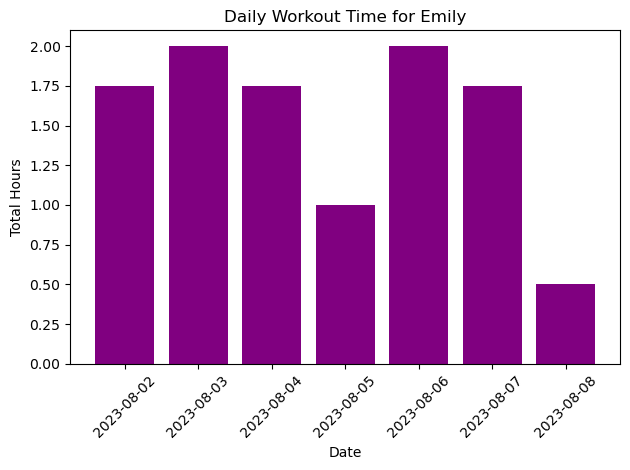


Total hours spent in gym by Emily: 10.75 hours


In [ ]:
print("Hello! Welcome to AnytimeAssistant, the chatbot for Anytime Fitness.")

user_data = pd.read_excel('user_data.xlsx')

response = input("\nAre you a new user, an existing user, or do you want to exit? (type 'new', 'existing', or 'exit'): ")

if response.lower() == 'new':
    new_user_options()
elif response.lower() == 'existing':
    while True:
        target_id = input("\nPlease enter your customer id: ").lower()
        if target_id in user_data['customerId'].tolist():
            existing_user_options(target_id)
            break
        else:
            print("Sorry, you seem to have entered an invalid customer id. Please try again.")
            continue
        
elif response.lower() == 'exit':
    print("Thank you! Have a nice day.")
else:
    print("We're sorry, we couldn't understand your response. Please type 'new', 'existing', or 'exit'.")    